### Import Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Extract the Data

In [2]:
df=pd.read_excel(r"C:\Users\shopinverse\Documents\Python Datasets\Sterling E-Commerce Data (2).xlsx")
df.head(5)

Category           City     County  Cust Id Customer Since  \
0  Health & Sports           Bode   Humboldt   112285     2008-02-11   
1    Men's Fashion     Belleville  St. Clair   112386     2005-06-23   
2    Men's Fashion     Belleville  St. Clair   112386     2005-06-23   
3        Computing  Young America     Carver   112501     2013-09-15   
4    Entertainment  Young America     Carver   112501     2013-09-15   

  Date of Order        Full Name Gender  Item Id     Order Id Payment Method  \
0    2022-08-07   Renaud, Maudie      F   880913  100547952.0     Easypay_MA   
1    2022-08-08   Shimp, Mariela      F   881493  100548328.0     Easypay_MA   
2    2022-08-08   Shimp, Mariela      F   881492  100548328.0     Easypay_MA   
3    2022-08-18  Doiron, Latrina      F   886067  100551079.0        Payaxis   
4    2022-08-20  Doiron, Latrina      F   886878  100551618.0        Payaxis   

      Place Name  Ref Num   Region State User Name    Zip  Qty Ordered   Total  
0           Bode   352808  Midwest    IA  mcrenaud  50519            3    32.0  
1     Belleville   310849  Midwest    IL   mgshimp  62223            2    74.8  
2     Belleville   310849  Midwest    IL   mgshimp  62223            2    74.9  
3  Young America   578056  Midwest    MN  lmdoiron  55552            2  6822.9  
4  Young America   578056  Midwest    MN  lmdoiron  55552            2  2849.9

In [4]:
# Check the shape of the dataset in terms of number of rows and features 
df.shape

(283083, 19)

There are 283,083 rows and 19 features in the dataset

In [5]:
#Examine the summary of the dataset in details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [9]:
# Check the features for missing or incomplete data.
df.isna().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

There are no missing or incomplete data within the dataset.

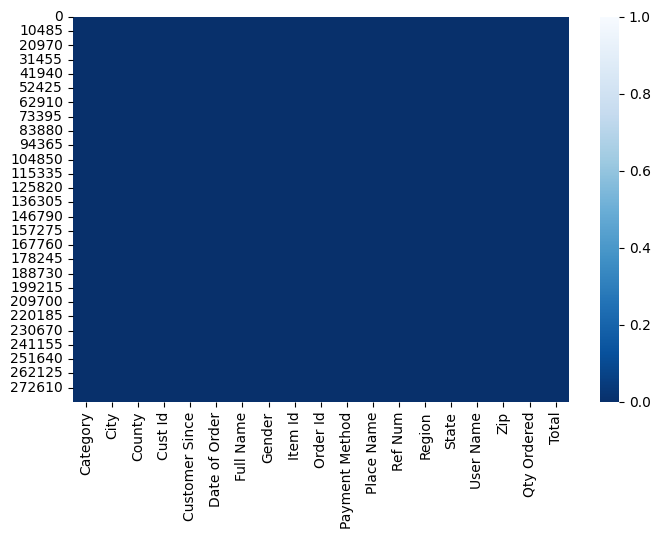

In [6]:
# Visualizing missing data

plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

The heatmap above also clearly shows that there are no missing data in the dataset. 

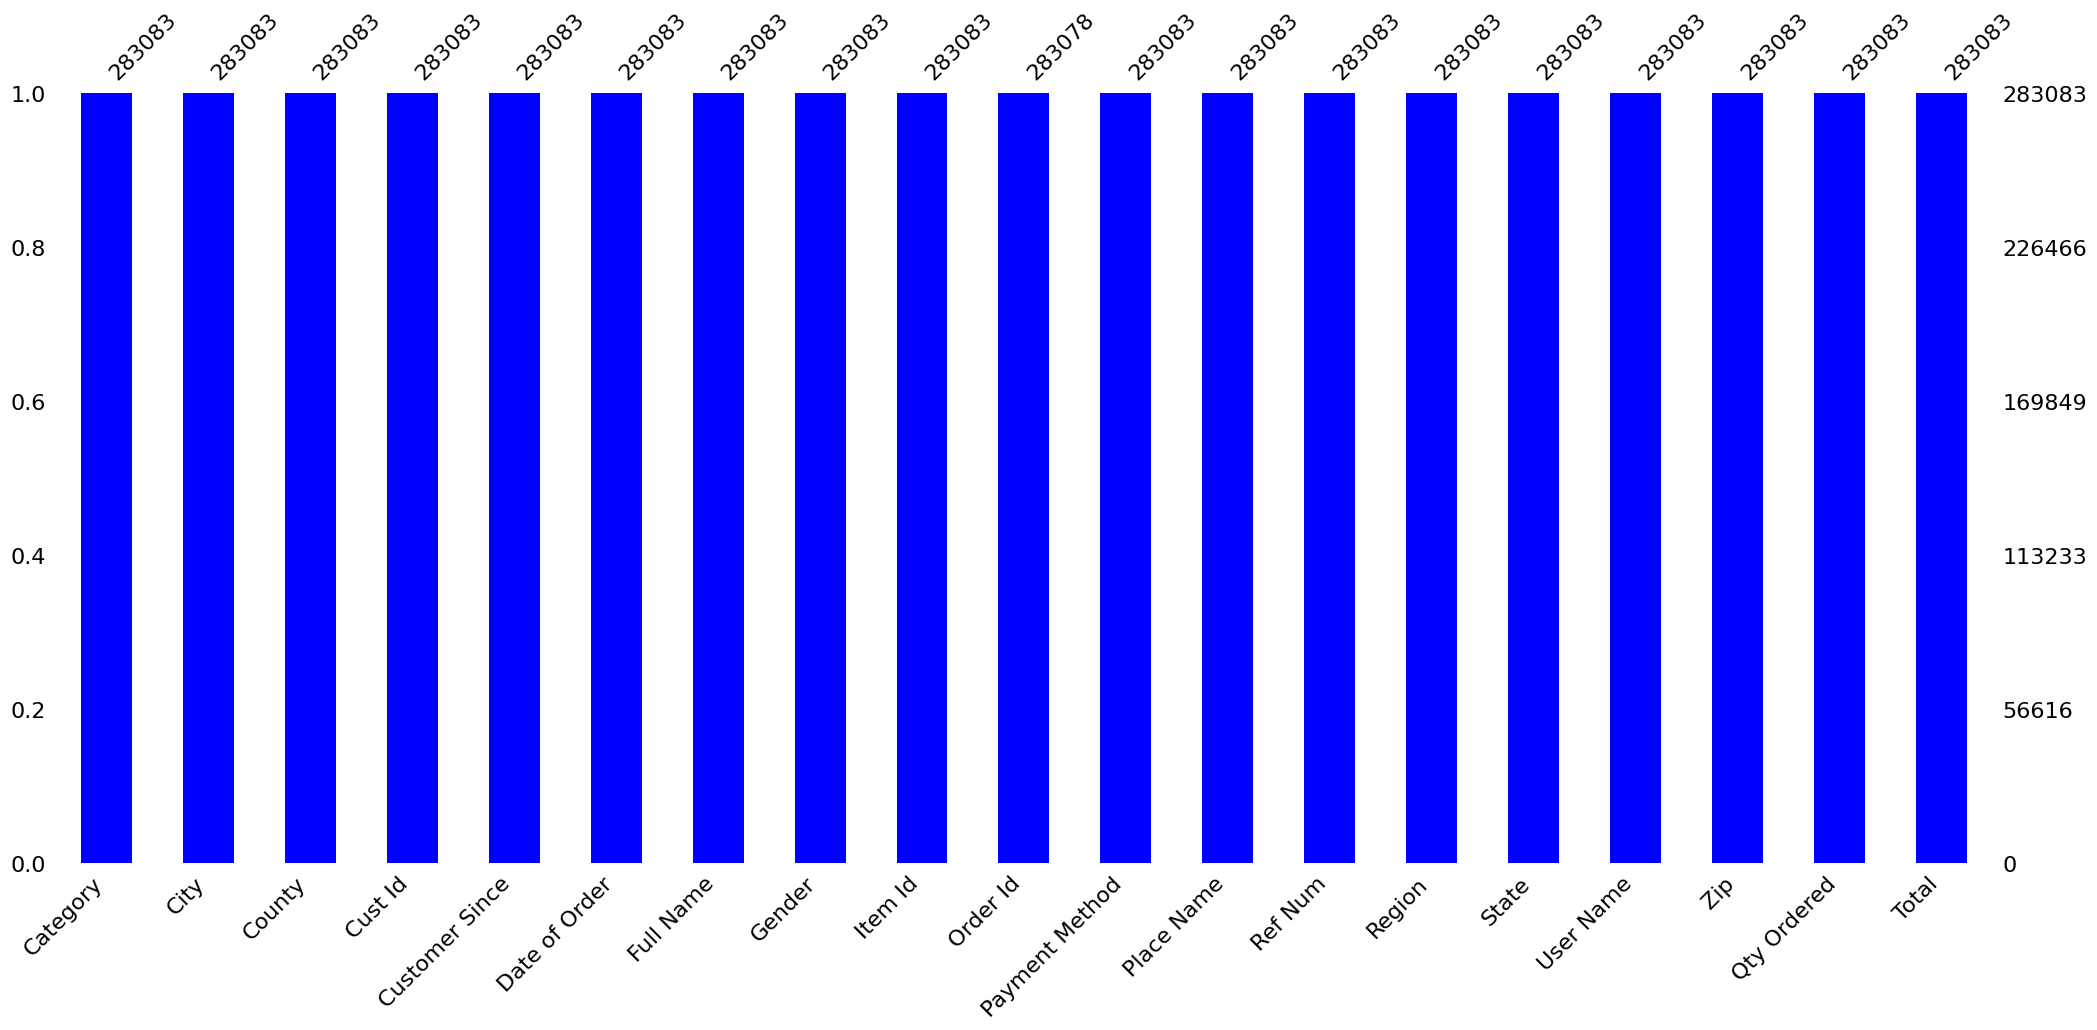

In [7]:
# Re-confirming that there are no missing data in the dataset

msno.bar(df, color="blue");

The viz above also reconfirms that there no missing data in the dataset

In [18]:
# Check for duplicate features

df.duplicated().sum()

0

There are no features with duplicates within the dataset 

In [8]:
# Statistical description of ONLY catergorical features

df.describe(exclude=np.number)

Category    City     County                 Customer Since  \
count              283083  283083     283083                         283083   
unique                 15   15668       2518                            NaN   
top     Mobiles & Tablets  Dekalb  Jefferson                            NaN   
freq                60954    2525       3510                            NaN   
mean                  NaN     NaN        NaN  2007-10-11 22:23:18.552368384   
min                   NaN     NaN        NaN            1978-11-04 00:00:00   
25%                   NaN     NaN        NaN            2002-08-24 00:00:00   
50%                   NaN     NaN        NaN            2010-03-22 00:00:00   
75%                   NaN     NaN        NaN            2015-01-05 00:00:00   
max                   NaN     NaN        NaN            2017-07-28 00:00:00   

                        Date of Order       Full Name  Gender Payment Method  \
count                          283083          283083  283083         283083   
unique                            NaN           63610       2             13   
top                               NaN  Gonzalez, Joel       M            cod   
freq                              NaN            2524  144295         101750   
mean    2022-03-12 12:24:32.794904832             NaN     NaN            NaN   
min               2021-10-01 00:00:00             NaN     NaN            NaN   
25%               2021-12-24 00:00:00             NaN     NaN            NaN   
50%               2022-03-16 00:00:00             NaN     NaN            NaN   
75%               2022-05-18 00:00:00             NaN     NaN            NaN   
max               2022-09-30 00:00:00             NaN     NaN            NaN   

       Place Name  Region   State   User Name  
count      283083  283083  283083      283083  
unique      15668       4      49       63407  
top        Dekalb   South      TX  jugonzalez  
freq         2525  103482   17510        2524  
mean          NaN     NaN     NaN         NaN  
min           NaN     NaN     NaN         NaN  
25%           NaN     NaN     NaN         NaN  
50%           NaN     NaN     NaN         NaN  
75%           NaN     NaN     NaN         NaN  
max           NaN     NaN     NaN         NaN

In [20]:
# Statistical describtion of ONLY numerical features (Transpose to view all in dataset)

df.describe()

Cust Id                 Customer Since  \
count  283083.000000                         283083   
mean    70106.816026  2007-10-11 22:23:18.552368384   
min         4.000000            1978-11-04 00:00:00   
25%     56640.000000            2002-08-24 00:00:00   
50%     74320.000000            2010-03-22 00:00:00   
75%     92371.000000            2015-01-05 00:00:00   
max    115326.000000            2017-07-28 00:00:00   
std     30215.394879                            NaN   

                       Date of Order        Item Id      Order Id  \
count                         283083  283083.000000  2.830780e+05   
mean   2022-03-12 12:24:32.794904832  741747.110628  1.004570e+08   
min              2021-10-01 00:00:00  574769.000000  1.003547e+08   
25%              2021-12-24 00:00:00  659898.500000  1.004047e+08   
50%              2022-03-16 00:00:00  742471.000000  1.004518e+08   
75%              2022-05-18 00:00:00  826078.500000  1.005134e+08   
max              2022-09-30 00:00:00  905208.000000  1.005624e+08   
std                              NaN   95664.609013  6.090992e+04   

             Ref Num            Zip    Qty Ordered          Total  
count  283083.000000  283083.000000  283083.000000  283083.000000  
mean   561107.885991   49147.171374       3.008224     816.230712  
min    111127.000000     210.000000       1.000000       0.000000  
25%    341071.000000   26264.000000       2.000000      49.900000  
50%    565623.000000   48808.000000       2.000000     149.800000  
75%    782211.000000   72004.000000       3.000000     800.000000  
max    999981.000000   99402.000000     501.000000  101262.590000  
std    256101.205409   27235.561738       4.565168    1986.164932

##### Observations from the Dataset 

- The dataset does not have missing data
- The dataset does not have duplicate data
- The dataset does not have inconsistencies 
- The dataset has a fine mix of both numerical and categorical features.
- Therefore, we'ld proceed with the Exploratory Data Analysis procedure. 

## Exploratory Data Analysis 

## Univariate Analysis

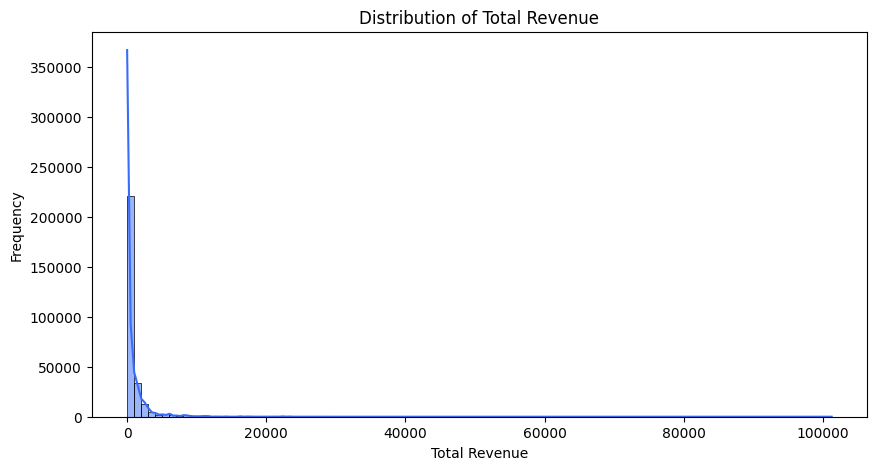

In [25]:
# Univariate distribution of the dependent feature (Total Revenue) 

''' Choose a color palette '''
palette = 'rainbow'

plt.figure(figsize=(10, 5))
''' Set the color palette '''
sns.set_palette(palette)  

sns.histplot(df['Total'], bins=100, kde=True)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

The Total revenue distribution is right skewed with most customer spend below 1,000 and count between 1 to 350,000. While there are outliers of total spend from 1,000 with the highest outlier above 100,000.

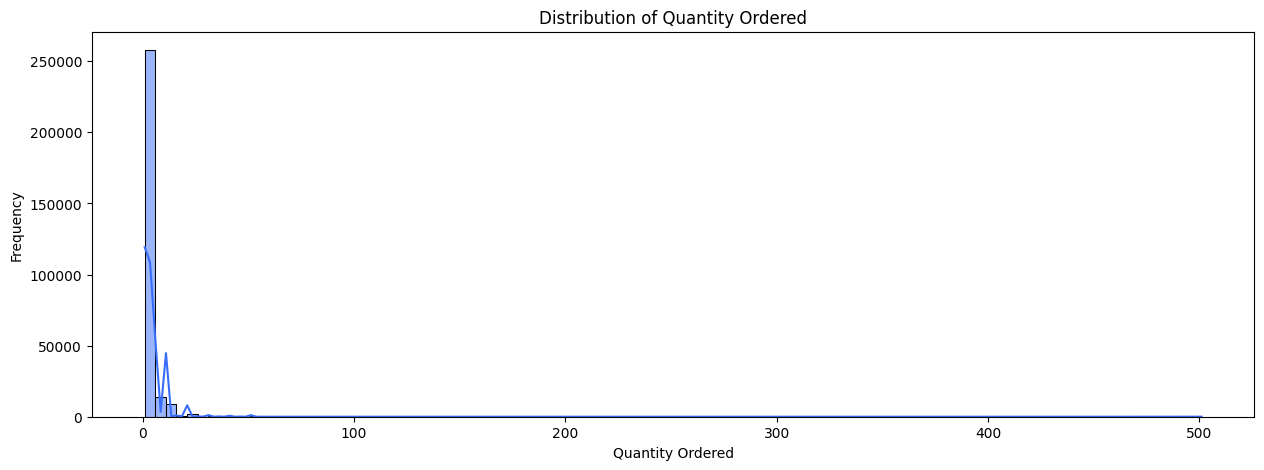

In [26]:
# Univariate distribution of the feature - Quantity Ordered

''' Choose a color palette '''
palette = 'rainbow'

plt.figure(figsize=(15, 5))
''' Set the color palette '''
sns.set_palette(palette)  

sns.histplot(df['Qty Ordered'], bins=100, kde=True)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

The quantity ordered distribution is right skewed with the most quantity ordered between 1 to 50 with frequency or counts between 1 to 250,000. There are outliers for quantity ordered from 50 and above with the hightest at 500. 

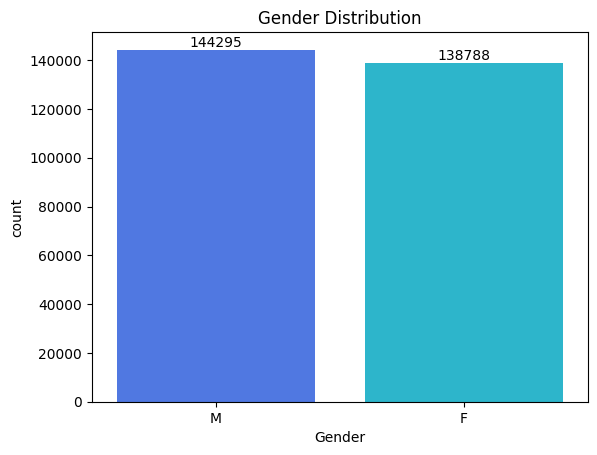

In [16]:
# Visualizing count of transactions by Gender in the dataset

ax=sns.countplot(x=df["Gender"], order=df["Gender"].value_counts(ascending=False).index)
values=df["Gender"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Gender Distribution");

Male customers did more transactions than female customers by a total difference of 5,507 transactions

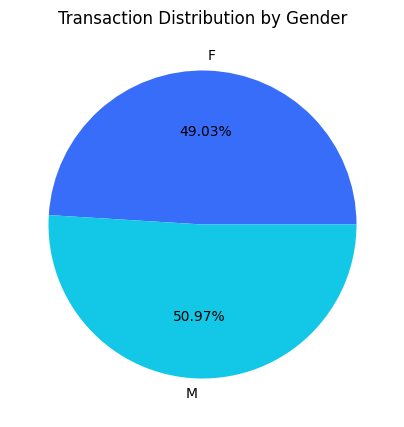

In [27]:
# Visualizing Gender distribution in terms of Percentage distribution. 

fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df["Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Transaction Distribution by Gender");

Male customers had a slightly higher share of the count of transactions compared to their female counterpart as shown by the pie chart.

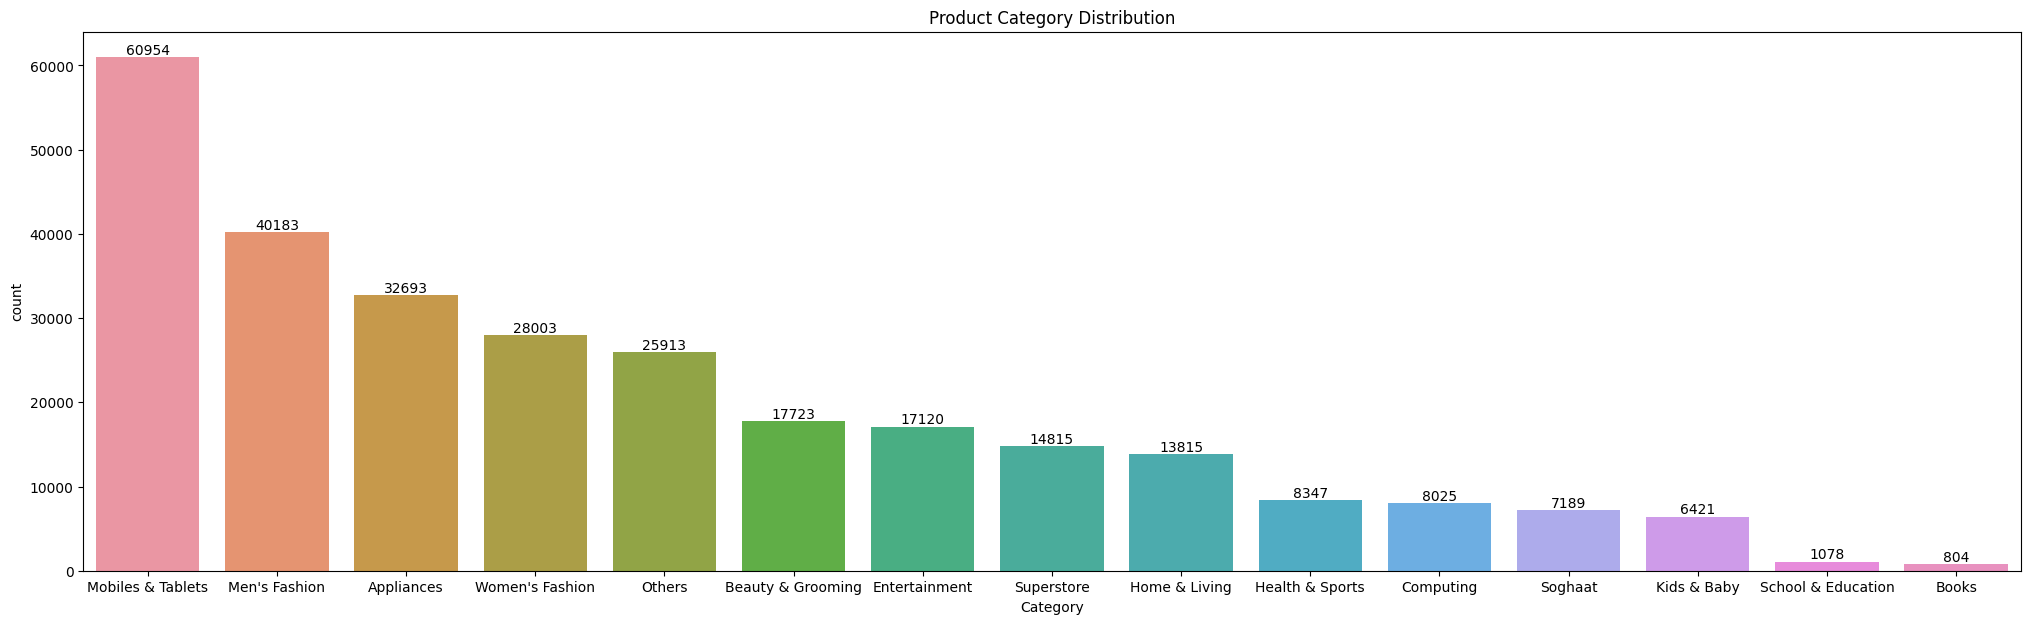

In [28]:
#Visualizing count of transactions by Category

plt.figure(figsize=(25,7))
ax=sns.countplot(x=df["Category"], order=df["Category"].value_counts(ascending=False).index)
values=df["Category"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Product Category Distribution");

The product category with the most transactions was Mobile & Tablets followed by Men's fashion, Appliance and Women's fashion in that order while the least was Books.

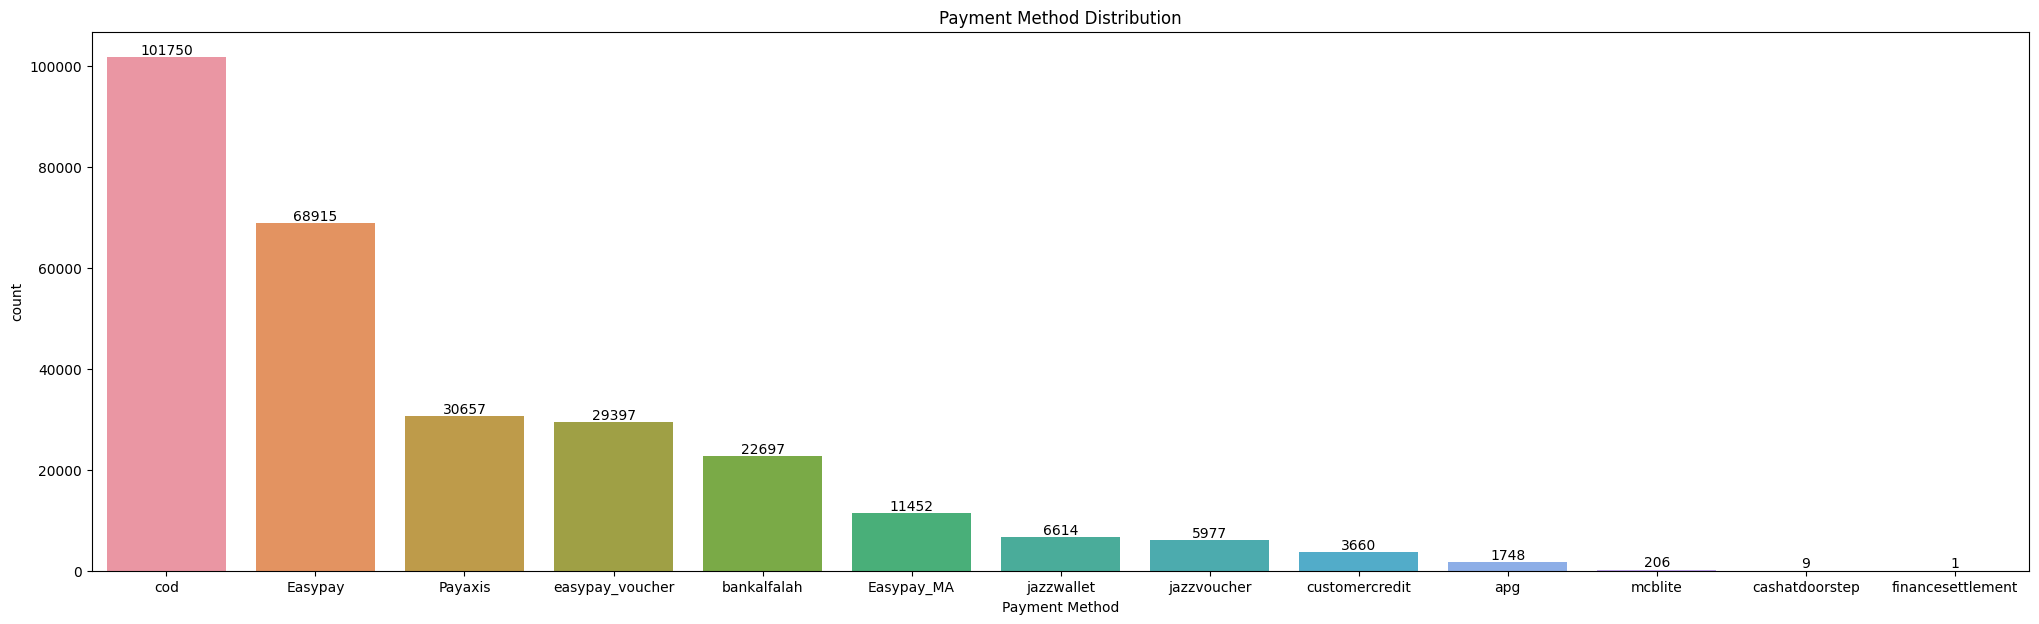

In [29]:
#Visualizing count of transactions by Payment Methods

plt.figure(figsize=(25,7))
ax=sns.countplot(x=df["Payment Method"], order=df["Payment Method"].value_counts(ascending=False).index)
values=df["Payment Method"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Payment Method Distribution");

The payment method with the highest count of transactions used by customers to complete their transactions was Cod, followed by Easypay, Payaxis and Easypay_voucher in that order while the least was Financesettlement.

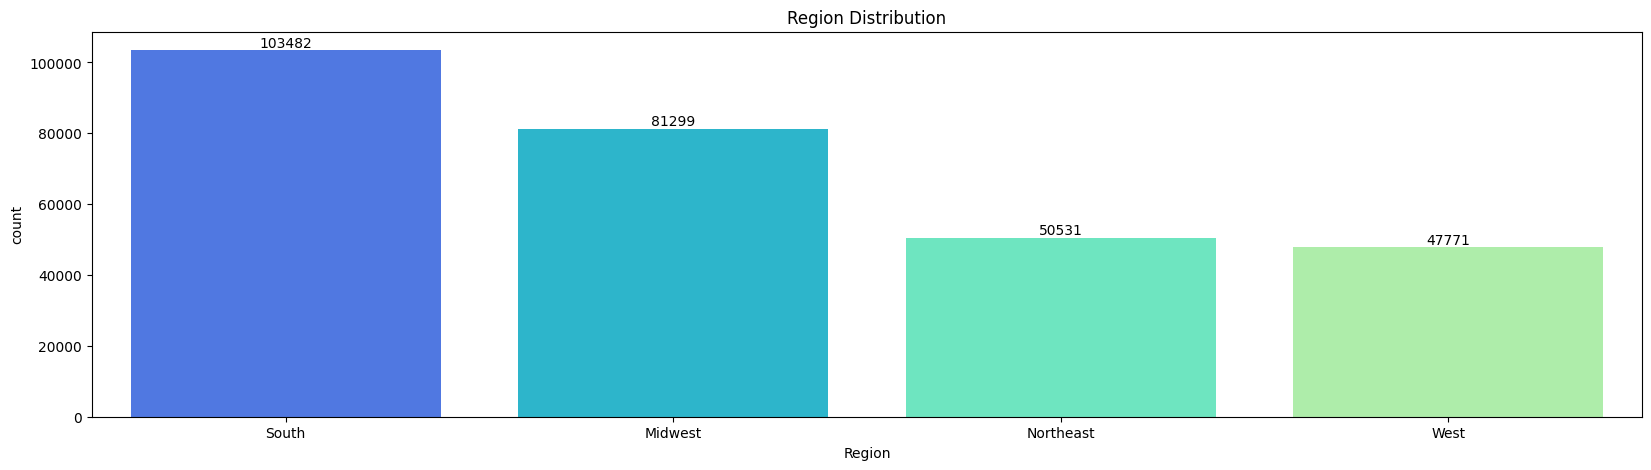

In [30]:
#Visualizing count of transactions by Region 

plt.figure(figsize=(20,5))
ax=sns.countplot(x=df["Region"], order=df["Region"].value_counts(ascending=False).index)
values=df["Region"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Region Distribution");

The region with the highest count of transactions was the South Region followed by the Midwest and Northwest regions in second and third position while West was the least region.

City
Dekalb           2525
Washington       2008
New York City    1391
Houston          1249
El Paso          1019
Atlanta           999
Dallas            838
Springfield       817
Albany            726
Kittanning        716
Name: count, dtype: int64


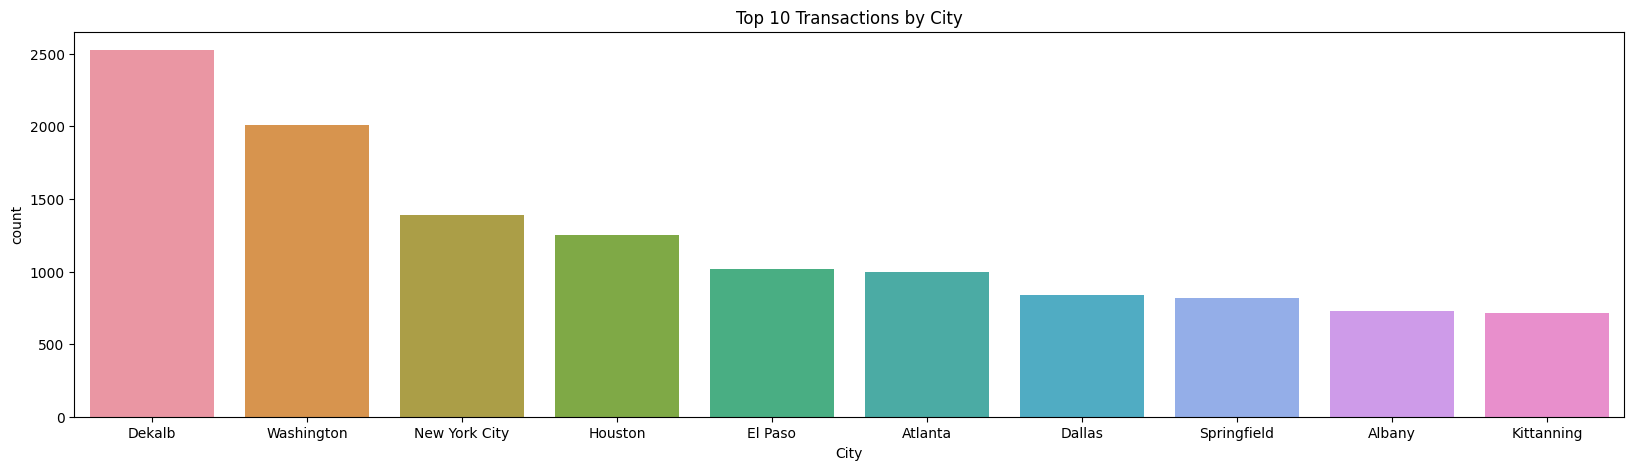

In [21]:
#Total Transactions by City (Top 10 Only).

plt.figure(figsize=(20,5))
topten=df["City"].value_counts().head(10)
sns.countplot(x="City", data=df, order=topten.index);
print(topten)
plt.title("Top 10 Transactions by City")
plt.show();

Above viz shows the top 10 Cities by count of transactions with the highest being Dekalb with 2,525 completed transactions while Kittanning was in 10th place with 716 transactions. 

County
Jefferson      3510
Los Angeles    3198
DeKalb         3098
Washington     2863
Montgomery     2563
Orange         2474
Wayne          1971
Monroe         1906
Franklin       1878
Polk           1846
Name: count, dtype: int64


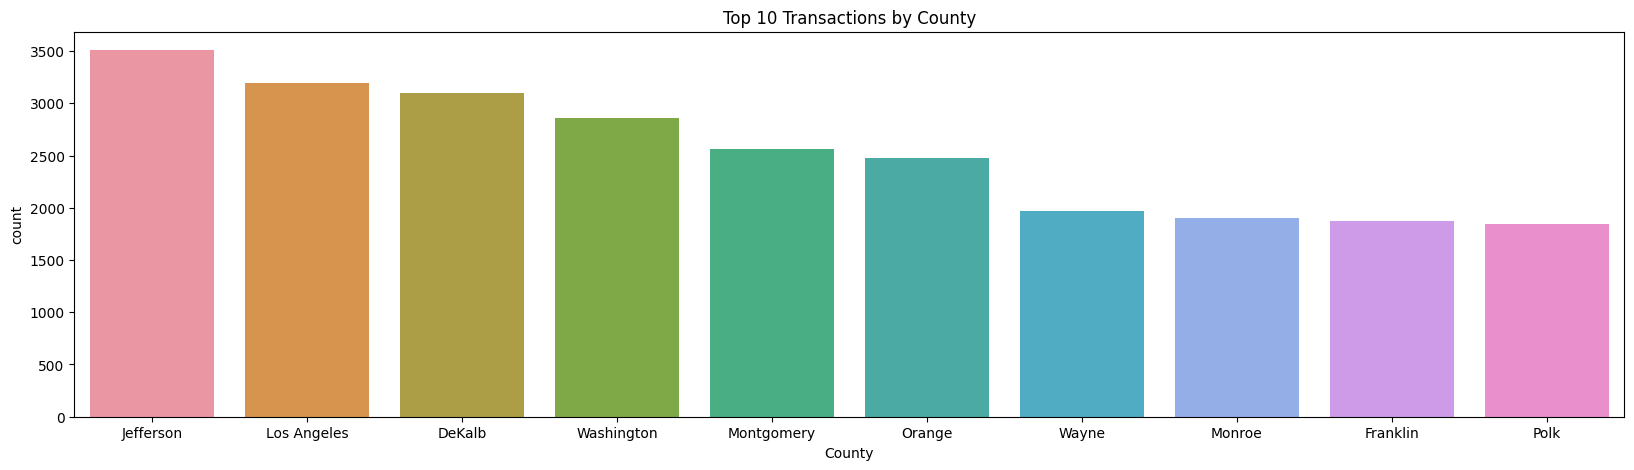

In [31]:
#Total Transactions by County (Top 10 Only).

plt.figure(figsize=(20,5))
topten=df["County"].value_counts().head(10)
sns.countplot(x="County", data=df, order=topten.index);
print(topten)
plt.title("Top 10 Transactions by County")
plt.show();

Above viz shows the top 10 Counties by count of transactions with the highest being Jefferson with 3,510 completed transactions while Polk came in at 10th position with a total of 1,846 transactions. 

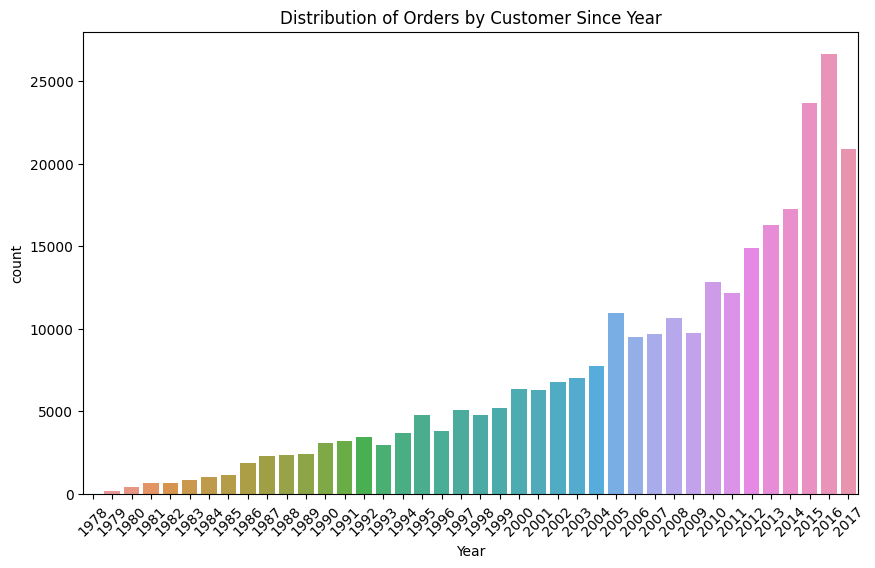

In [13]:
# Customer Since Analysis
plt.figure(figsize=(10, 6))
df["Customer Since"] = pd.to_datetime(df["Customer Since"])
df["Year"] = df["Customer Since"].dt.year
sns.countplot(x="Year", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Orders by Customer Since Year")
plt.show()

The chart above shows distribution of customer acquisition by year. It clearly depicts a steady increase of customer sign-up each year from inception in 1978 to 2017 with the highest recorded in 2016 by over 25,000 while the second highest year was recorded in 2015 at 24,000 while there was a significant drop in 2017 to 20,000.

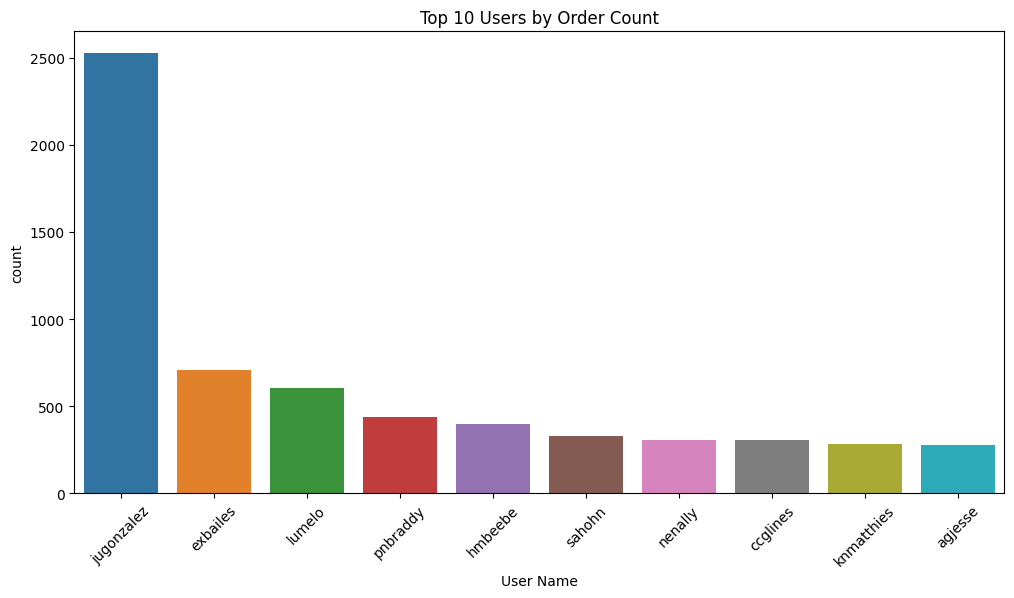

In [15]:
# User Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x="User Name", data=df, order=df["User Name"].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Users by Order Count")
plt.show()

The above chart shows the 10 ten customers by Quantity ordered. The customer with user name - Jungonzalez made the highest order of slightly over 2,500 while customer with user name Agjesse was 10th with a total order of 300. 

## Bivariate Analysis

##### We used Bivariate analysis to examine the relationship between two numerical features. 

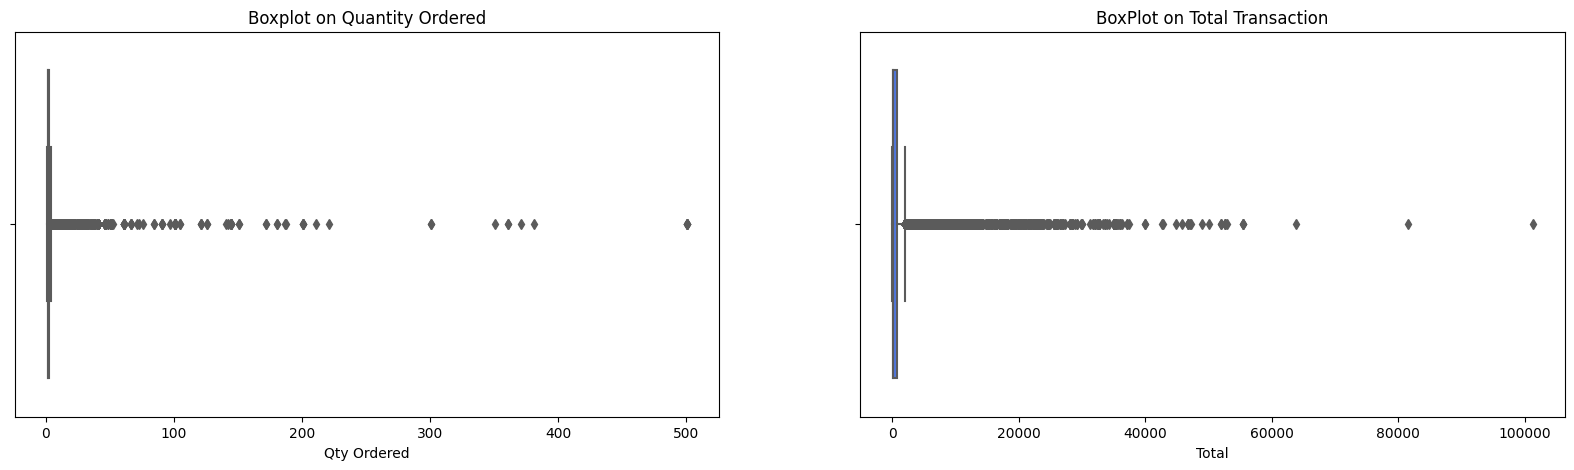

In [24]:
#Visualizing relationship between Quantity Ordered & Total Transaction features. 

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(20,5))

'''viz for boxplot on Quantity Ordered'''
sns.boxplot(x="Qty Ordered", data=df, ax=axs[0])
axs[0].set_title("Boxplot on Quantity Ordered");

'''viz for boxplot on Total'''
sns.boxplot(x="Total", data=df, ax=axs[1])
axs[1].set_title("BoxPlot on Total Transaction");          


The boxplot on the left depicts the Quantity Ordered feature in the dataset with variying outliers with the highest quantity ordered at 500 while the boxplot on the right depicts the the total revenue feature in the dateset with varying outliers with the highest slightly above 100,000.

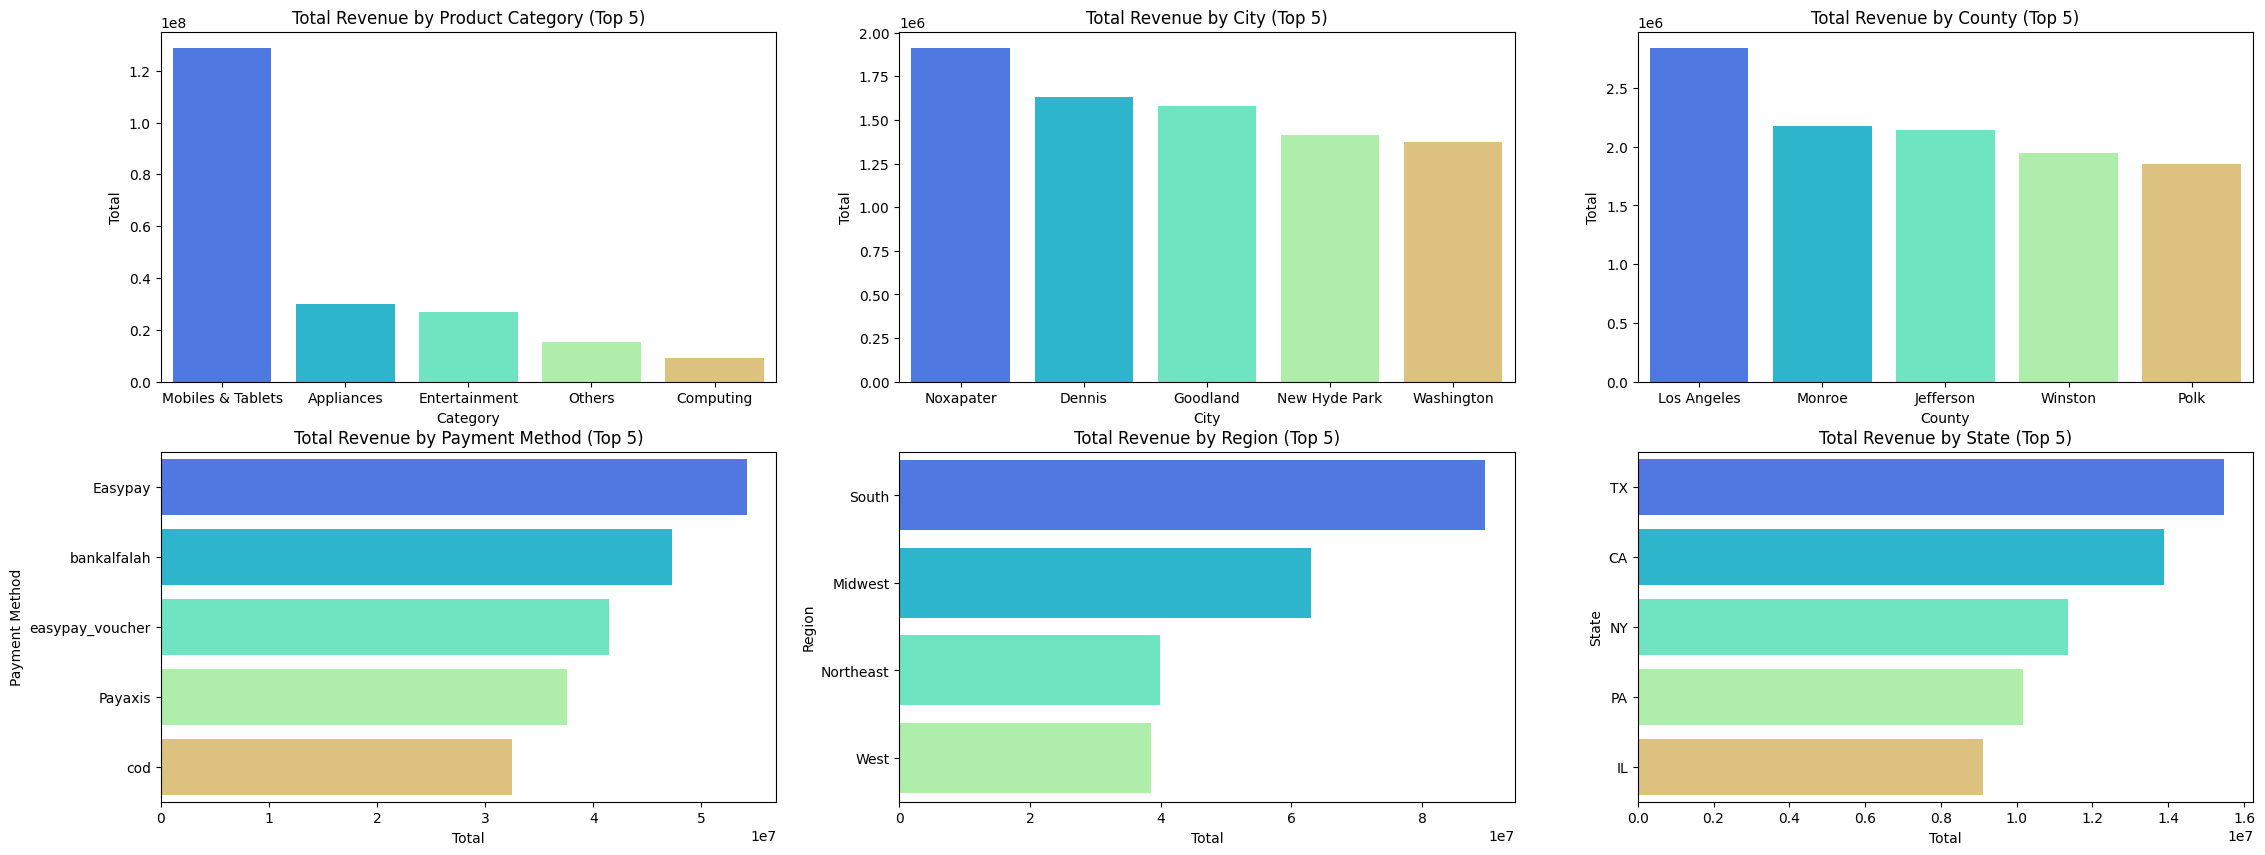

In [32]:
# Visualizing the relationship between some categorical features and total revenue. Grouped in order of top five ranking. 

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27, 10))

'''viz for barplot depicting relationship between Category & Total Sales'''
cat_total = df.groupby("Category")["Total"].sum().reset_index()

# Get the top five categories by total sales
topfive = cat_total.nlargest(5, "Total")

# Bar plot with top five categories
sns.barplot(x="Category", data=cat_total, y="Total", ax=axs[0, 0], order=topfive["Category"])
axs[0, 0].set_title("Total Revenue by Product Category (Top 5)")

'''viz for barplot depicting relationship between City & Total Sales'''
city_total = df.groupby("City")["Total"].sum().reset_index()

# Get the top five cities by total sales
topfive = city_total.nlargest(5, "Total")

# Bar plot with top five cities
sns.barplot(x="City", data=city_total, y="Total", ax=axs[0, 1], order=topfive["City"])
axs[0, 1].set_title("Total Revenue by City (Top 5)")

'''viz for barplot depicting relationship between County & Total Sales'''
county_total = df.groupby("County")["Total"].sum().reset_index()

# Get the top five counties by total sales
topfive = county_total.nlargest(5, "Total")

# Bar plot with top five counties
sns.barplot(x="County", data=county_total, y="Total", ax=axs[0, 2], order=topfive["County"])
axs[0, 2].set_title("Total Revenue by County (Top 5)")

'''viz for barplot depicting relationship Payment Method & Total Sales'''
pm_total = df.groupby("Payment Method")["Total"].sum().reset_index()

# Get the top five payment method by total sales
topfive = pm_total.nlargest(5, "Total")

# Bar plot with top five payment method 
sns.barplot(y="Payment Method", data=pm_total, x="Total", ax=axs[1, 0], order=topfive["Payment Method"])
axs[1, 0].set_title("Total Revenue by Payment Method (Top 5)")

'''viz for barplot depicting relationship Region & Total Sales'''
rg_total = df.groupby("Region")["Total"].sum().reset_index()

# Get the top five region by total sales
topfive = rg_total.nlargest(5, "Total")

# Bar plot with top five region
sns.barplot(y="Region", data=rg_total, x="Total", ax=axs[1, 1], order=topfive["Region"])
axs[1, 1].set_title("Total Revenue by Region (Top 5)")

'''viz for barplot depicting relationship State & Total Sales'''
st_total = df.groupby("State")["Total"].sum().reset_index()

# Get the top five state by total sales
topfive = st_total.nlargest(5, "Total")

# Bar plot with top five state
sns.barplot(y="State", data=st_total, x="Total", ax=axs[1, 2], order=topfive["State"])
axs[1, 2].set_title("Total Revenue by State (Top 5)");

In terms of top 5 sales by product category, Mobile & Tablets had the highest sales followed by Appliancies, Entertainment, Others and Computing. In terms of total sales by city, the city of Noxapater had the highest sales followed by Dennis, Goodland, New Hyde Park and Washington. Analysing total sales by County, Los Angeles County was top most with Monroe, Jefferson, Winston & Polk in second, third, fourth & fifth. 

Reviewing total sales by payment menthod, Easypay recorded the highest payment channel while the South region recorded the highest sales transaction by region. Lastly, the State of Texas had the highest transaction by state followed by California, New York, Pennsylvania and Illinois in that order. 

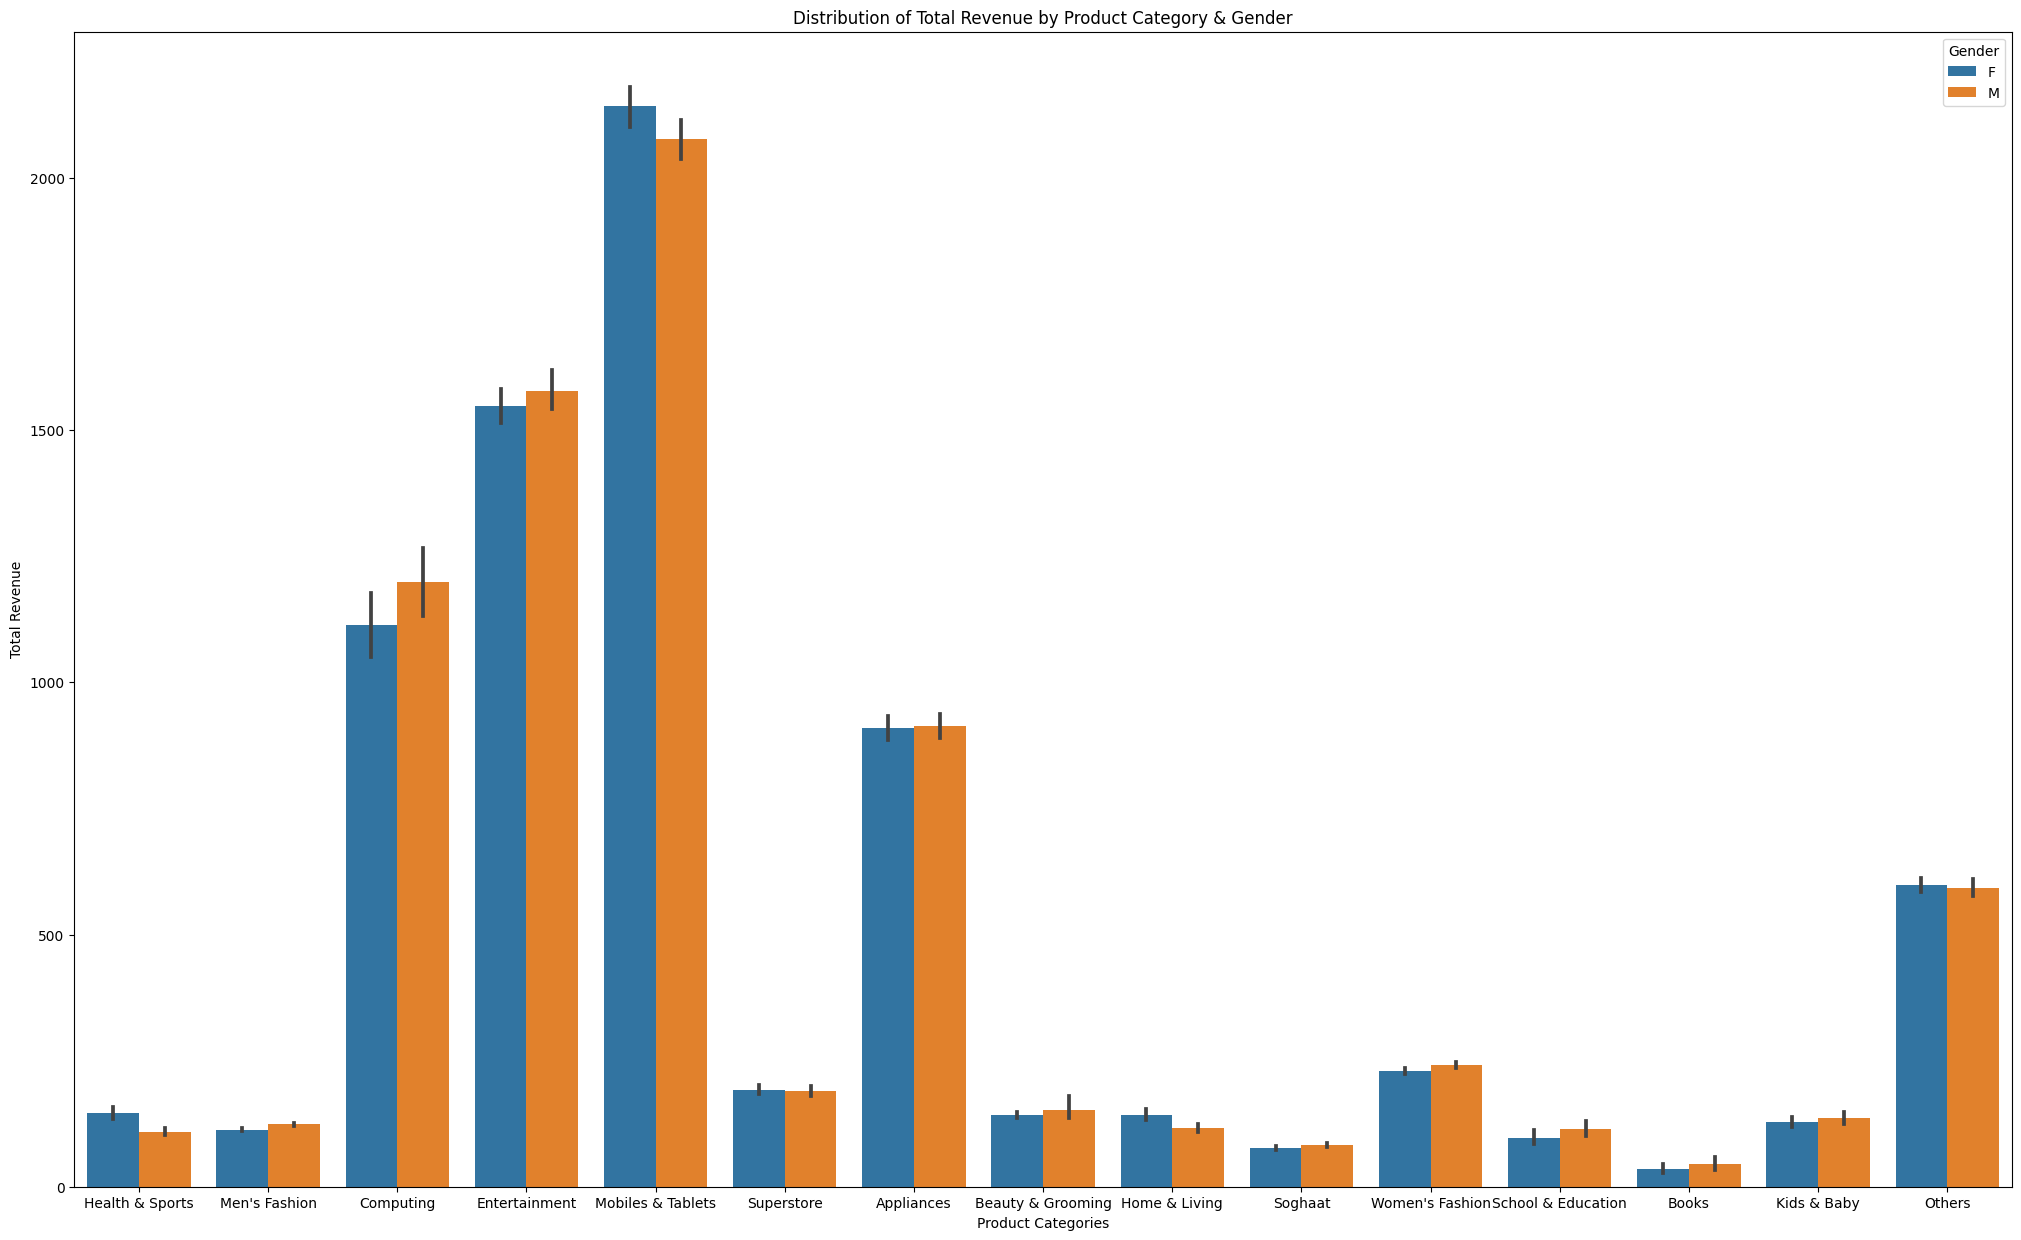

In [9]:
plt.figure(figsize=(25,15))
sns.barplot(x='Category', y= 'Total', hue= 'Gender', data= df)
plt.xlabel('Product Categories')
plt.ylabel('Total Revenue')
plt.title('Distribution of Total Revenue by Product Category & Gender')
plt.show();

The chart above shows the spending pattern between male and female gender by product categories. The most product purchased was Mobiles & Tablets with women purchasing more than men, the second, third & fourth categories were Entertainment, Computing & Appliancies with men outspending women. Apart from the Mobiles & Tablets category were women spend more than men, they also achieved same in these categories: Health & Sports, Superstore, Home & Living & others. 

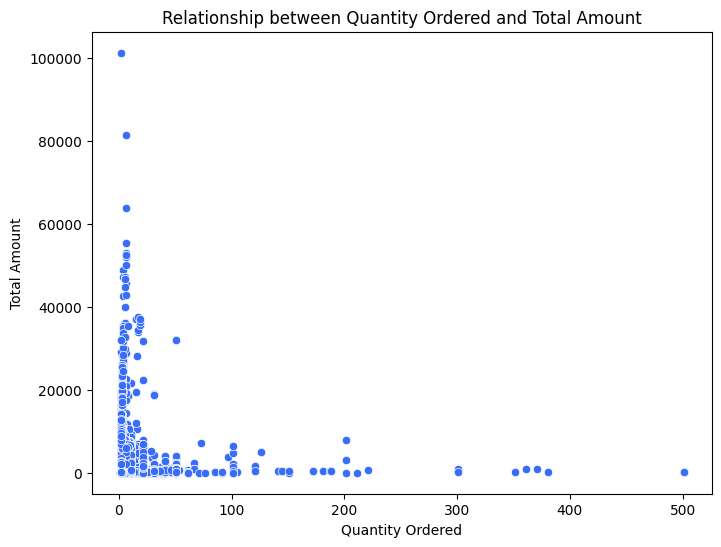

In [33]:
# Scatter Plot: Quantity Ordered vs Total Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Qty Ordered", y="Total", data=df)
plt.title("Relationship between Quantity Ordered and Total Amount")
plt.xlabel("Quantity Ordered")
plt.ylabel("Total Amount")
plt.show()

The above viz is a scatterplot for the Quantity ordered and Total revenue features which shows most ordered items numbered between 1 & 200 and with a total revenue of 60,000. There are outliers for both features - with the highest for quantity ordered at 500 and total revenue at slightly over 100,000.

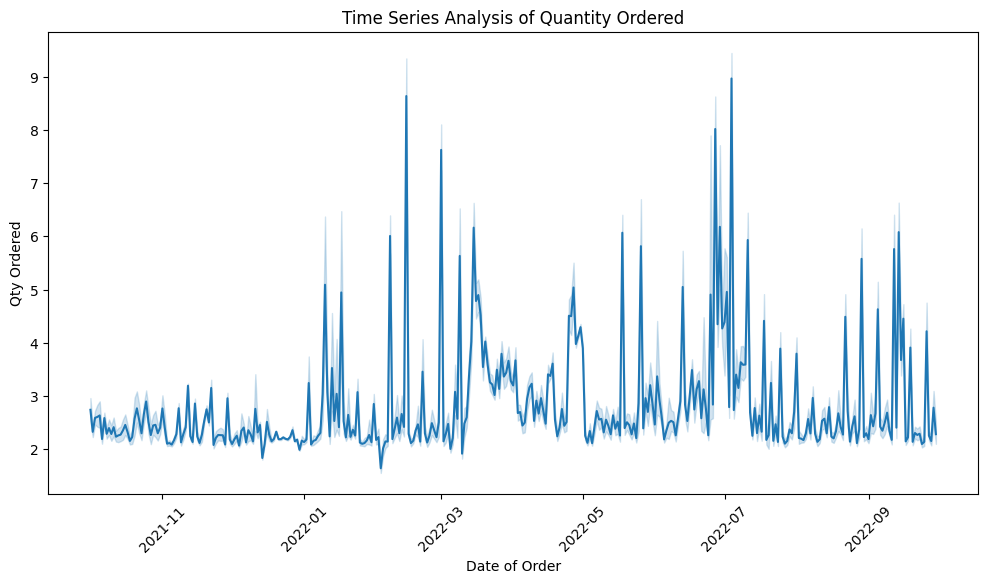

In [14]:
# Time Series Analysis (Date of Order)
df["Date of Order"] = pd.to_datetime(df["Date of Order"])
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date of Order", y="Qty Ordered", data=df)
plt.title("Time Series Analysis of Quantity Ordered")
plt.xticks(rotation=45)
plt.show()

In the time series analysis of quantity ordered for the last year above, it clearly shows that most orders were placed in February and July of 2022 while the least orders were recorded the last quarter of 2021 and January 2022. This may be because these months are the winter months in the year. 

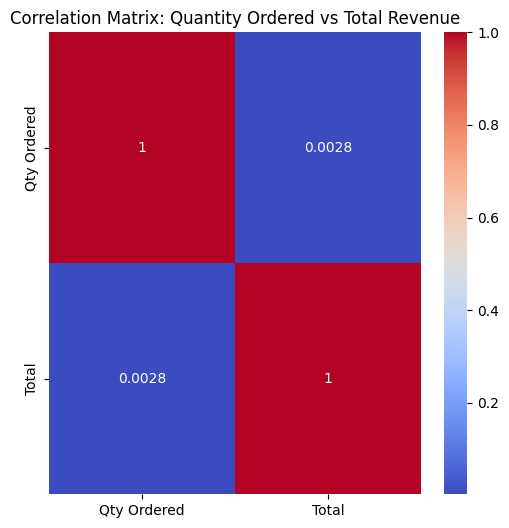

In [21]:
# Correlation Analysis
correlation_matrix = df[["Qty Ordered", "Total"]].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Quantity Ordered vs Total Revenue")
plt.show()

The chart above show a correlation matrix between the quantity ordered and total revenue features. We can see that both have a linear relationship with a weak positive relationship between both features. 

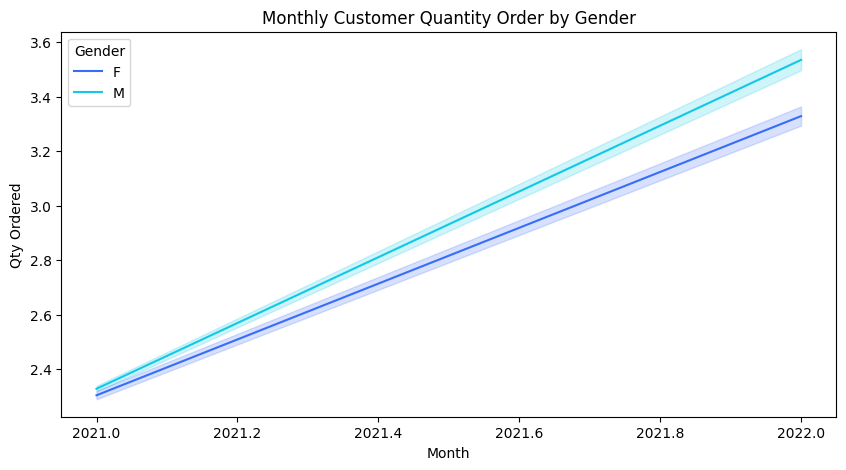

In [45]:
# Plotting Monthly customer quantity order by gender 
plt.figure(figsize=(10,5))
df["Date of Order"] = pd.to_datetime(df["Date of Order"])
df["Year"] = df["Date of Order"].dt.year
sns.lineplot(x='Year', y='Qty Ordered', hue= 'Gender', data= df)
plt.xlabel('Month')
plt.ylabel('Qty Ordered')
plt.title('Monthly Customer Quantity Order by Gender')
plt.show();

The Chart above show that in the last year Male customers ordered more items than Female customers on a monthly basis. 

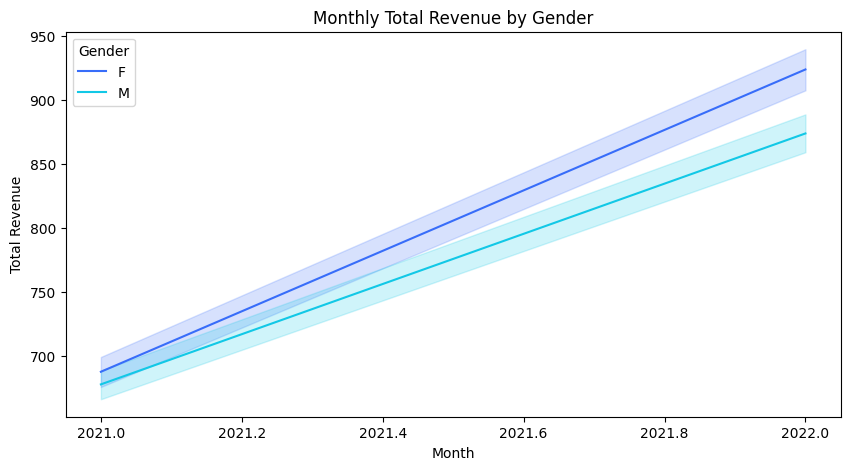

In [46]:
# Plotting Monthly Total revenue by gender 
plt.figure(figsize=(10,5))
df["Date of Order"] = pd.to_datetime(df["Date of Order"])
df["Year"] = df["Date of Order"].dt.year
sns.lineplot(x='Year', y='Total', hue= 'Gender', data= df)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Total Revenue by Gender')
plt.show();

Unlike the previous chart where Male customers ordered more items than Female customers, in this chart, Female customers outspent Male customers in the last one year.

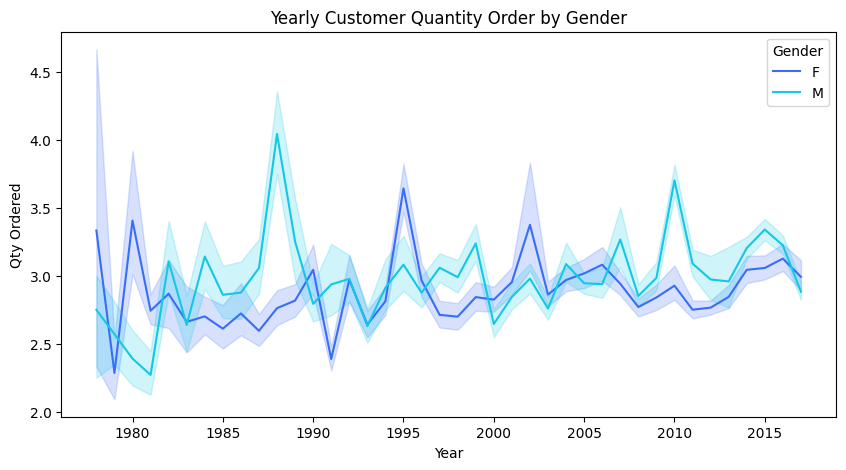

In [48]:
# Plotting Yearly customer quantity order by gender

plt.figure(figsize=(10,5))
df["Customer Since"] = pd.to_datetime(df["Customer Since"])
df["Year"] = df["Customer Since"].dt.year
sns.lineplot(x='Year', y='Qty Ordered', hue= 'Gender', data= df)
plt.xlabel('Year')
plt.ylabel('Qty Ordered')
plt.title('Yearly Customer Quantity Order by Gender')
plt.show();

Except for 1980 and 1995 were Female customers made more orders than Male customers, the other years had more orders initiated by Male customers especially in the last 5 years. 

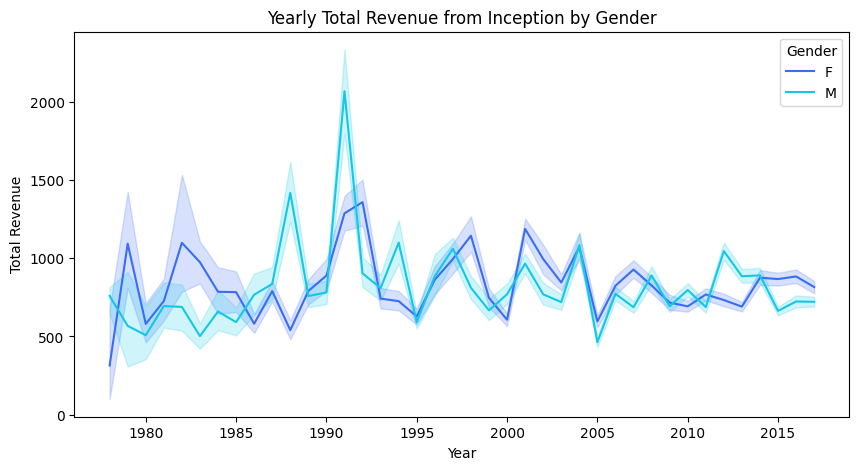

In [49]:
# Plotting yearly total revenue from inception by gender. 

plt.figure(figsize=(10,5))
df["Customer Since"] = pd.to_datetime(df["Customer Since"])
df["Year"] = df["Customer Since"].dt.year
sns.lineplot(x='Year', y='Total', hue= 'Gender', data= df)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Total Revenue from Inception by Gender')
plt.show();

In the chart above, Female customers have slightly outspent their Male counterparts since inception. 

## Multivariate Analysis

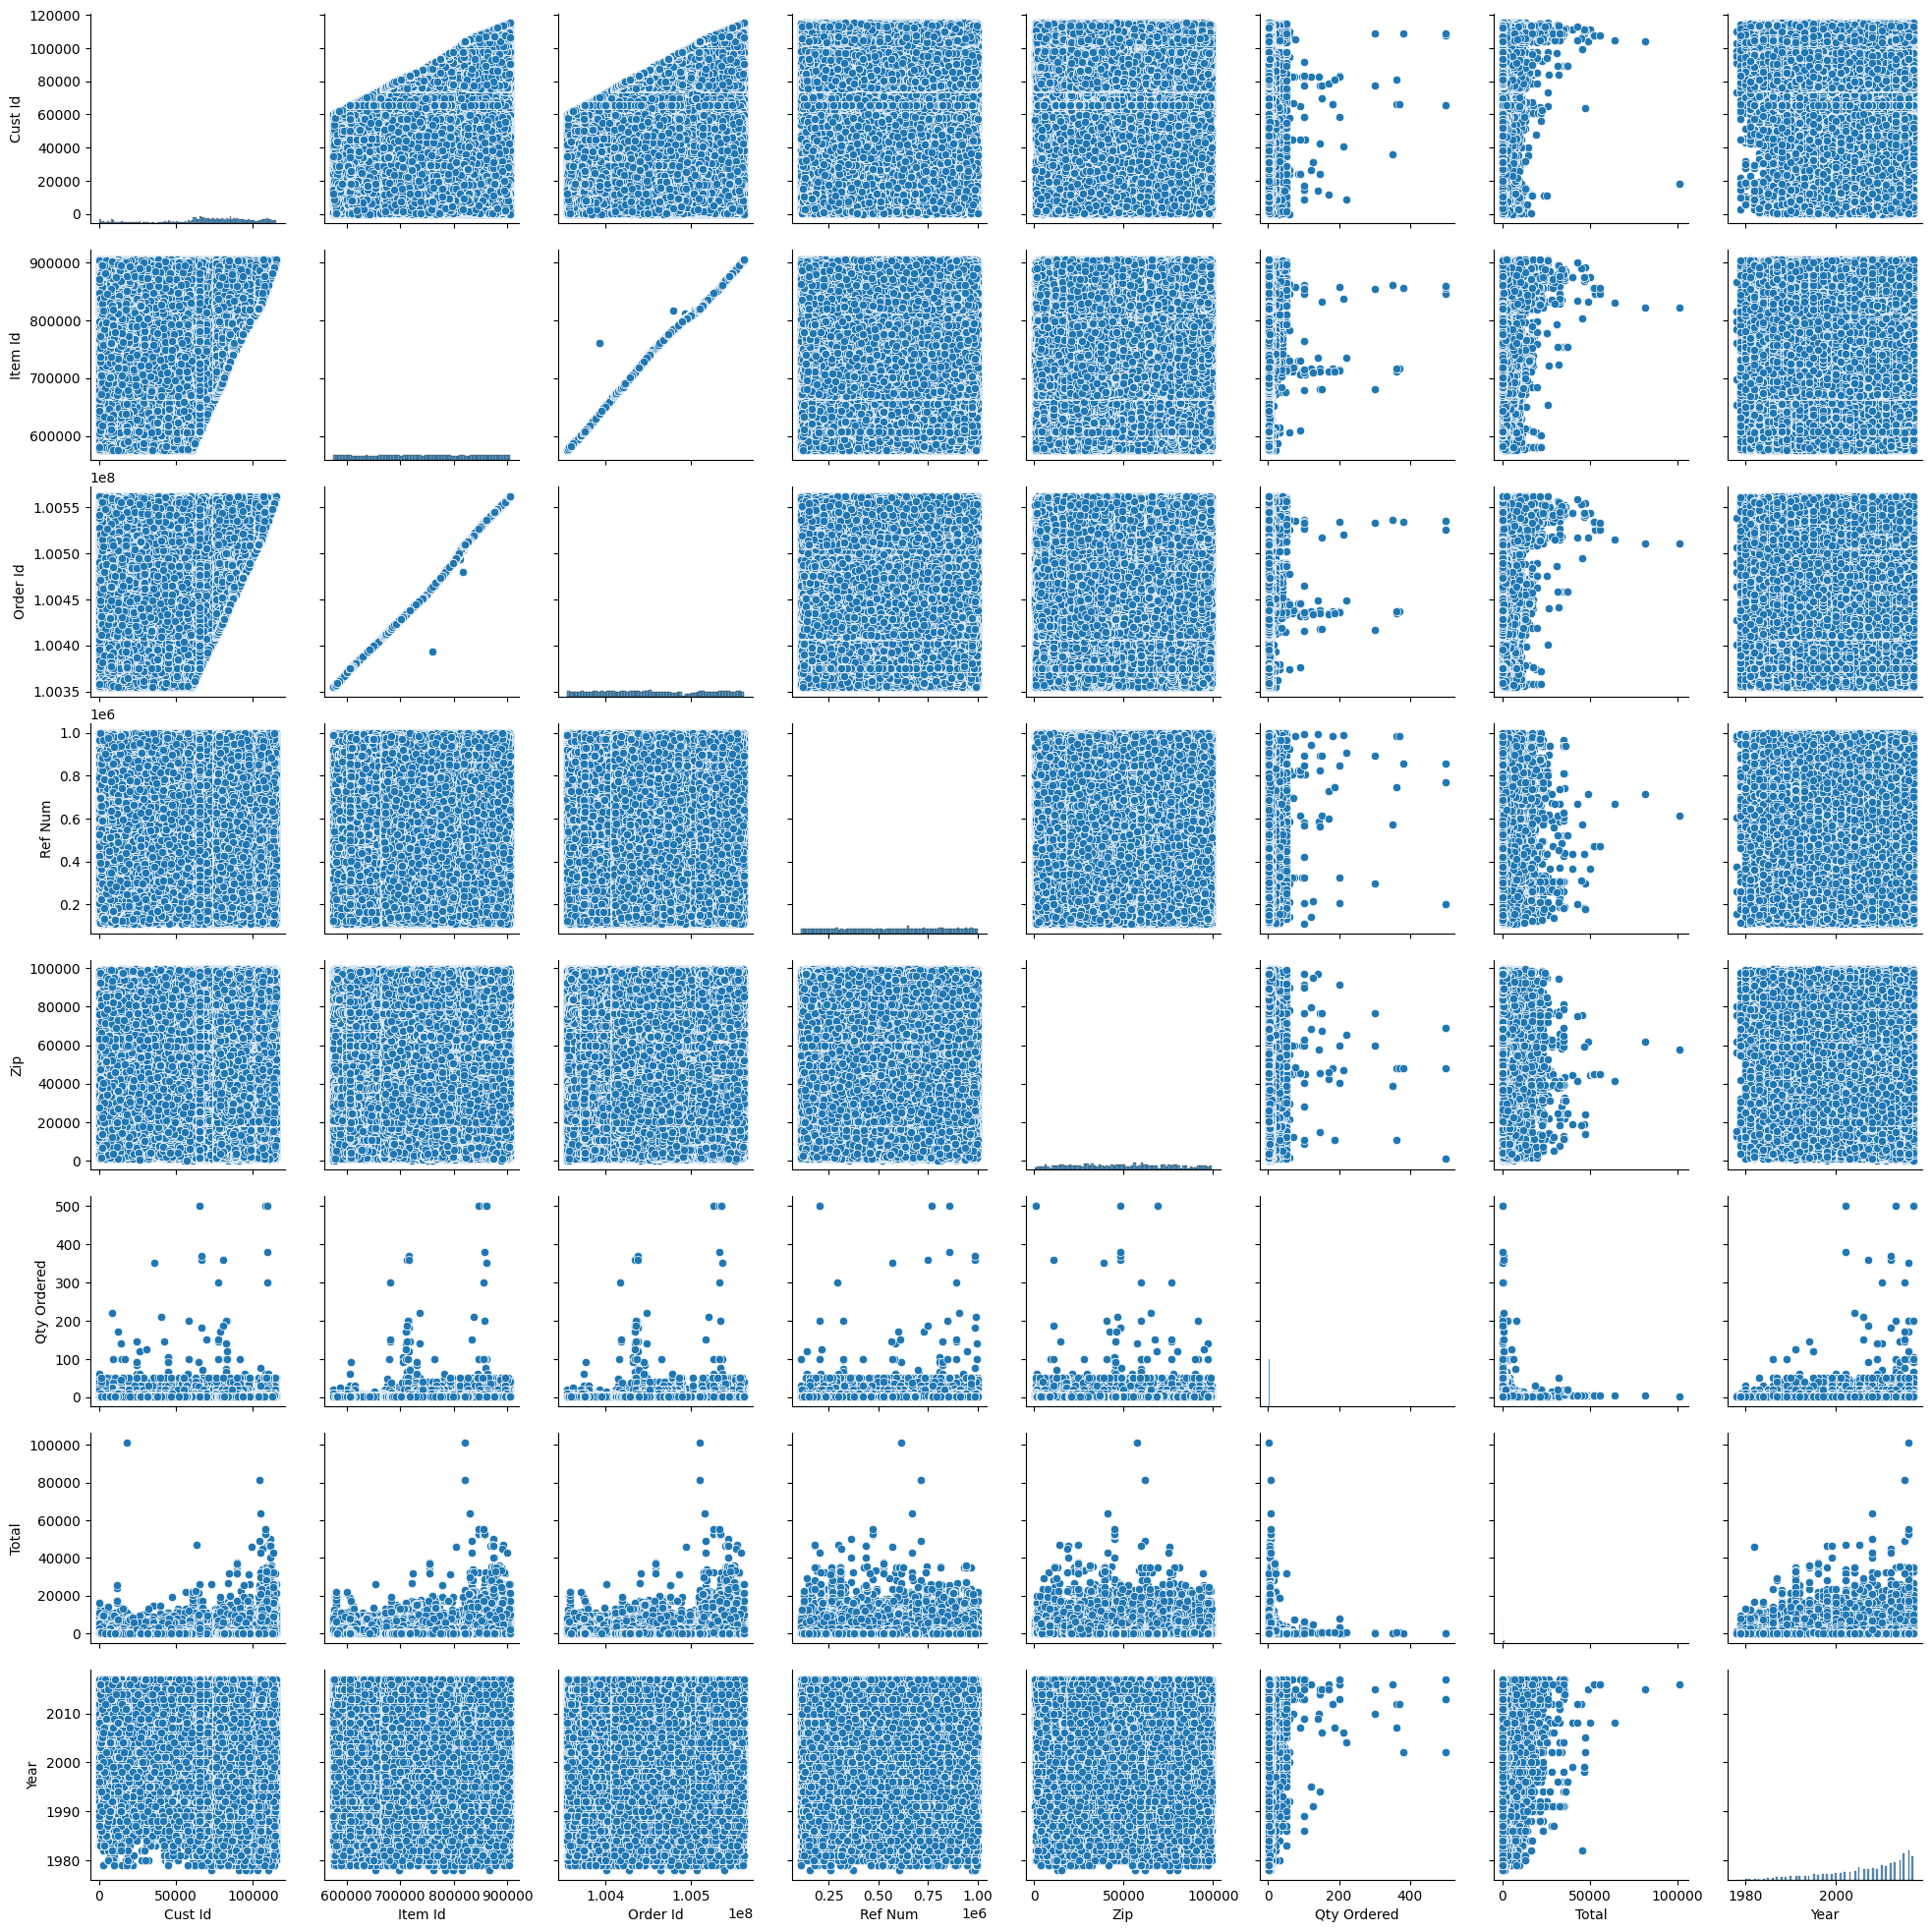

In [20]:
# Create a pair plot
sns.pairplot(df)
plt.show()

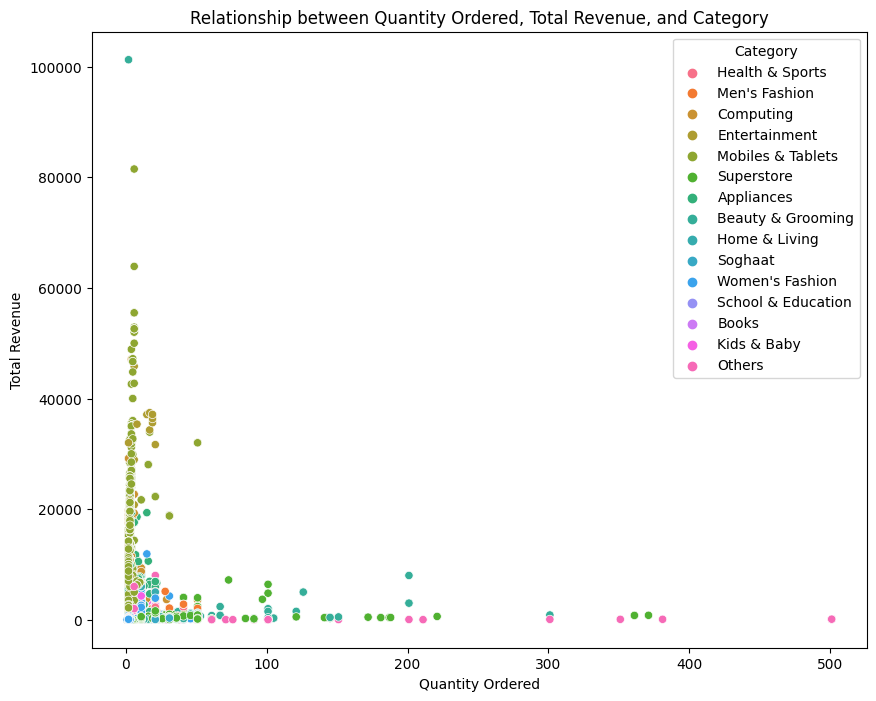

                    Qty Ordered        Total
Category                                    
Appliances             2.498639   911.686599
Beauty & Grooming      3.948598   147.673936
Books                  2.650498    40.108398
Computing              2.528972  1157.756794
Entertainment          2.005257  1563.335370
Health & Sports        3.400982   121.439908
Home & Living          2.987695   129.607440
Kids & Baby            3.185485   132.176336
Men's Fashion          2.518777   118.566319
Mobiles & Tablets      2.185599  2109.788744
Others                 4.188631   595.417040
School & Education     4.087199   105.582252
Soghaat                3.899986    79.314894
Superstore             6.716369   191.214626
Women's Fashion        2.789558   235.235303


In [22]:
# Scatter Plot: Quantity Ordered vs Total with Category Color
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Qty Ordered", y="Total", hue="Category", data=df)
plt.title("Relationship between Quantity Ordered, Total Revenue, and Category")
plt.xlabel("Quantity Ordered")
plt.ylabel("Total Revenue")
plt.legend(title="Category", loc="upper right")
plt.show()

# Calculate Summary Statistics for Each Category
category_summary = df.groupby("Category")[["Qty Ordered", "Total"]].mean()
print(category_summary)

In the chart above which shows the multivariate analysis between the total revenue, quantity orderd and product categories, Mobile & Tablets was top at while the least was Books. 

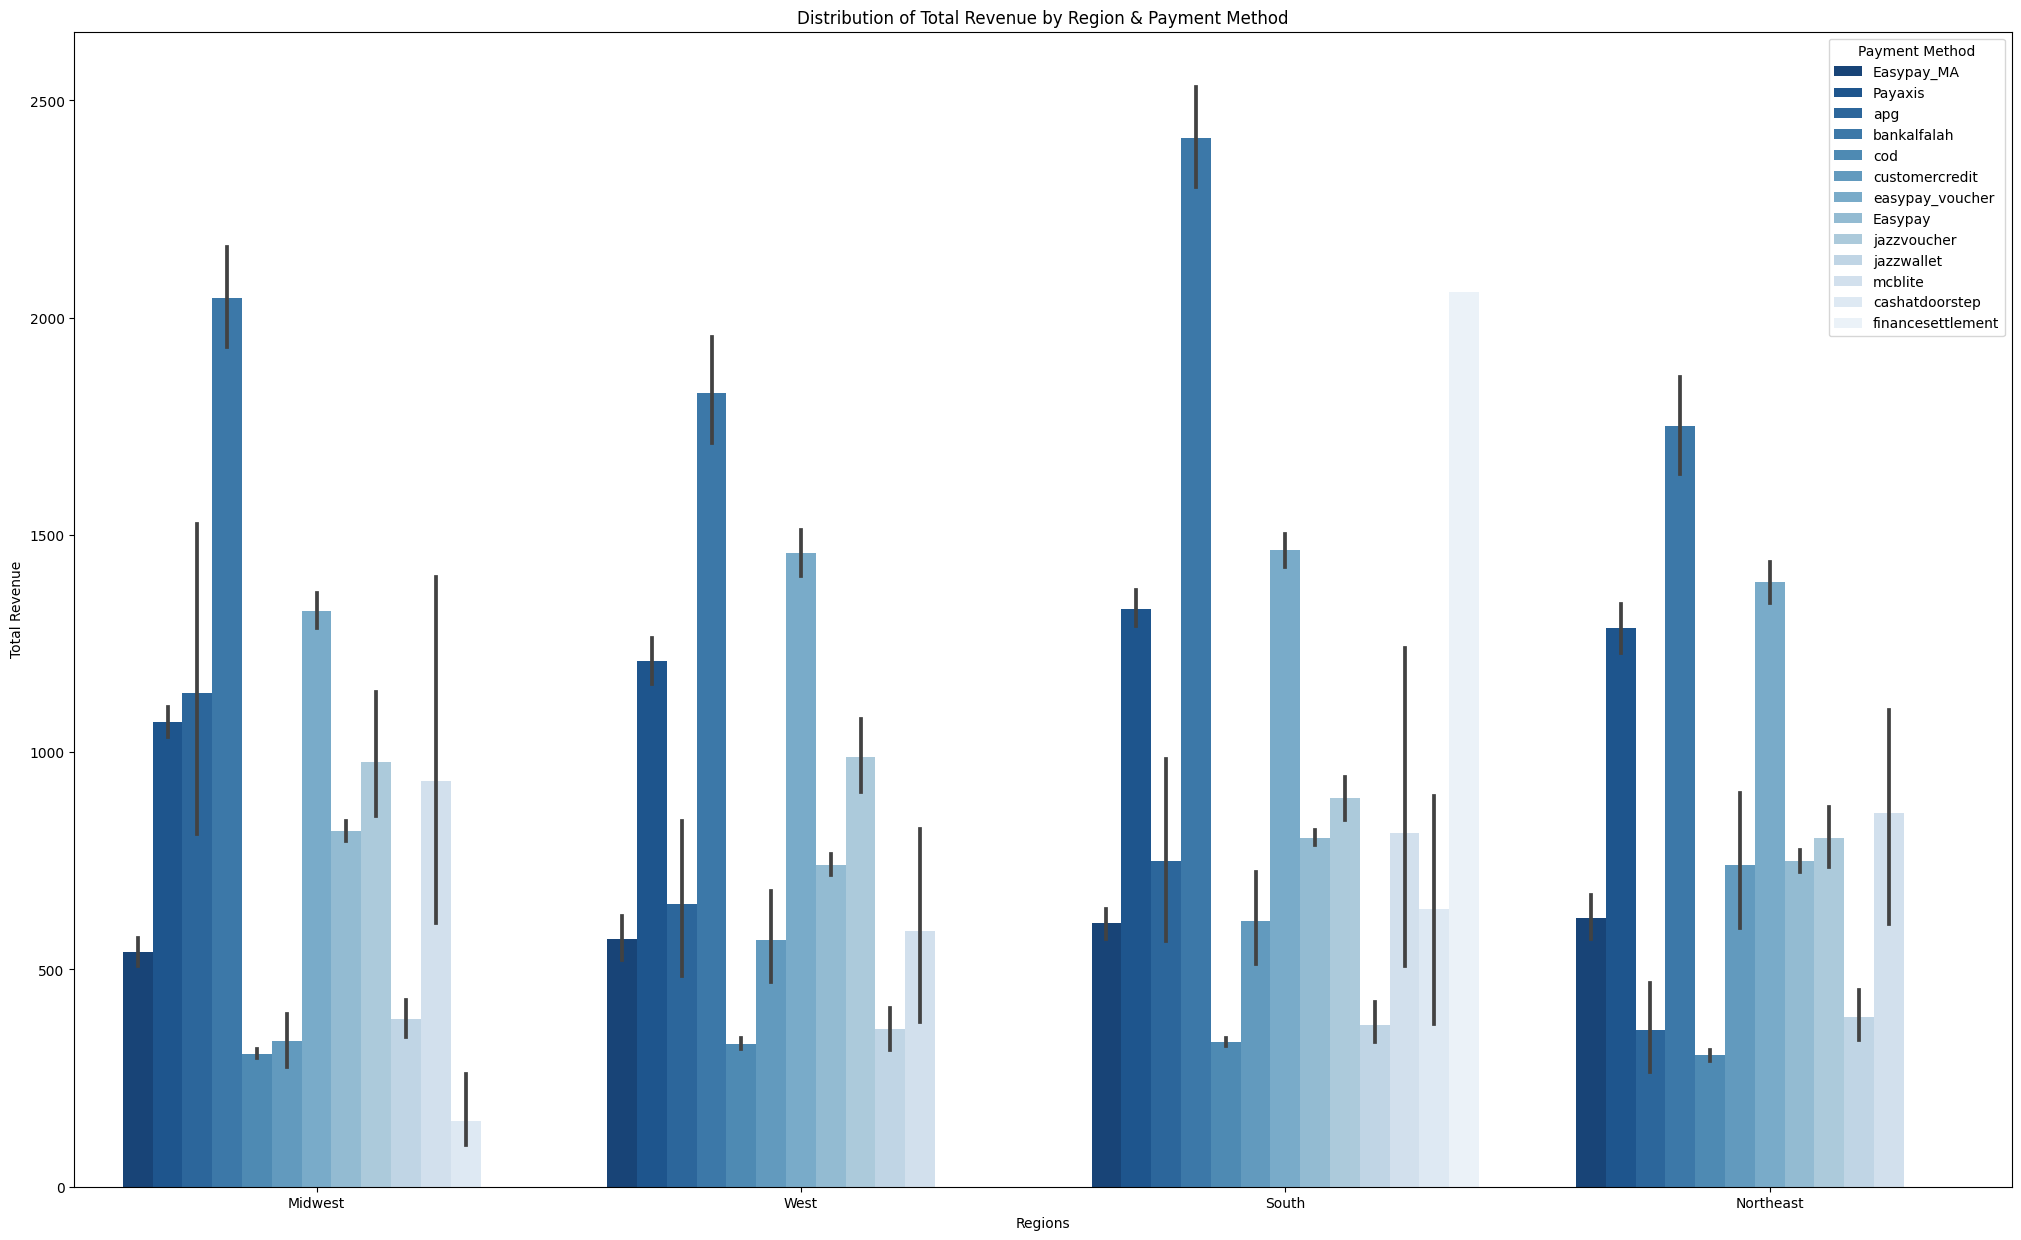

In [12]:
# Plotting payment methods analysis across regions 
plt.figure(figsize=(25,15))
sns.barplot(x='Region', y='Total', hue='Payment Method', data=df, palette= 'Blues_r')
plt.xlabel('Regions')
plt.ylabel('Total Revenue')
plt.title('Distribution of Total Revenue by Region & Payment Method')
plt.show();

Above is the viz for payment method analysis across regions 

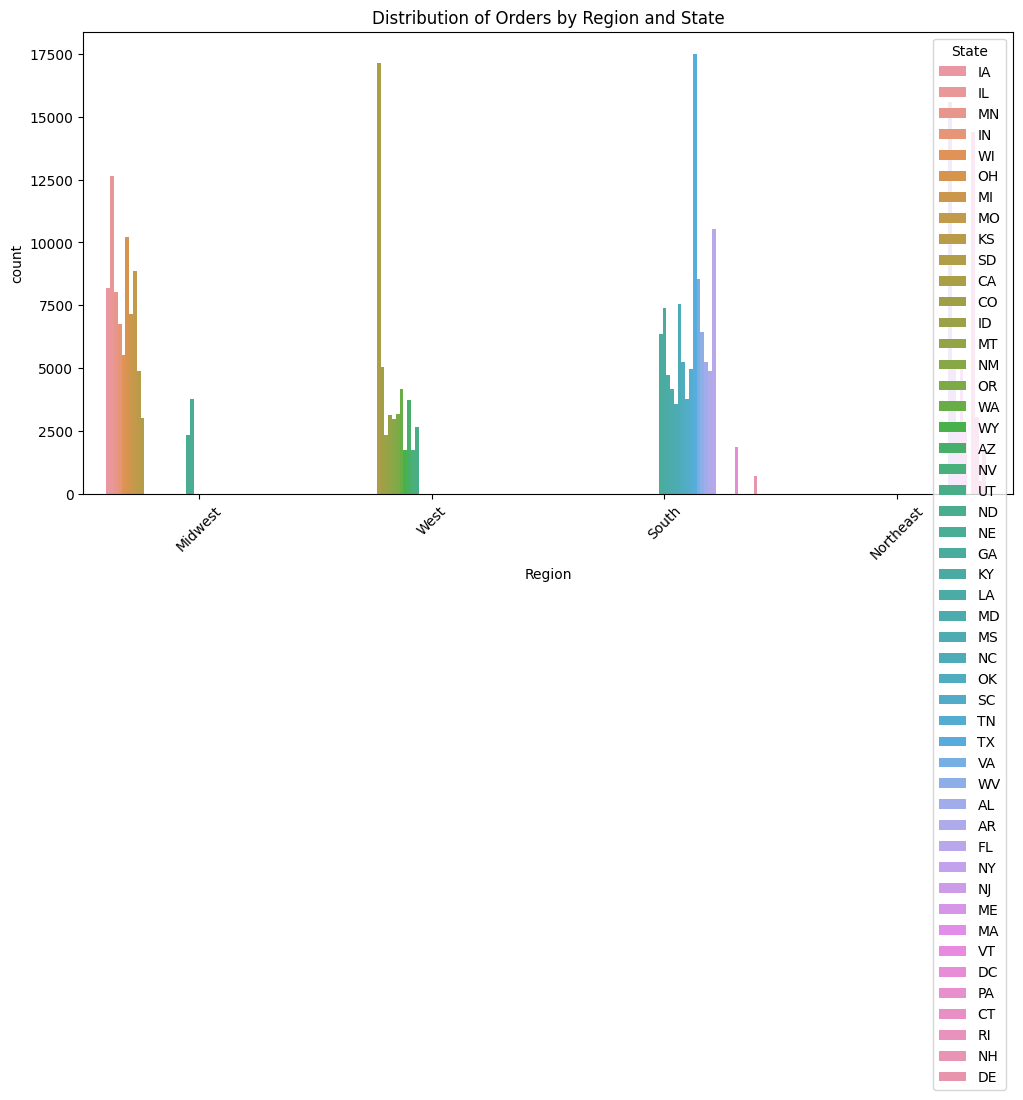

In [7]:
# Region and State Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x="Region", hue="State", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Orders by Region and State")
plt.legend(title="State", loc="upper right")
plt.show()

Above is the chart showing distribution of orders by state and region 

In summary, Sterling ecommerce management should adopt our recommendations as highlighted in our PPT presentation to enable the company optimize its products offerings, streamline its opeartions and enhance customer experience. 